In [22]:
import pandas as pd
from argparse import Namespace
import matplotlib.pyplot as plt

In [23]:
res =pd.read_csv('exp_results.csv')

In [26]:
res=res[res.roc>.75 ][res.acc>.69]
res

,id,hypers,roc,acc
53,55,"Namespace(experiment_id='55', head_linear=510,...",0.755077,0.695192
62,68,"Namespace(experiment_id='68', head_linear=401,...",0.769984,0.700962
89,96,"Namespace(experiment_id='96', head_linear=421,...",0.754849,0.696154
107,114,"Namespace(experiment_id='114', head_linear=451...",0.758146,0.693269


In [15]:
#vars(eval(res.iloc[62].hypers))

In [16]:
def get_hyper(row, name):
    hypers_namespace = eval(row.hypers)
    return vars(hypers_namespace)[name]

In [17]:
def plot(hyper, key='roc'):
    hyper2roc = [(get_hyper(row, hyper), row[key]) for _,row in res.iterrows()]
    plt.title(hyper)
    plt.scatter(*zip(*hyper2roc))
    plt.show()

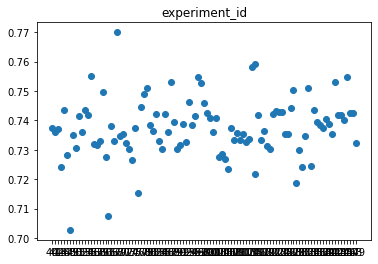

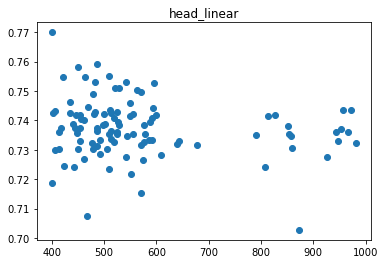

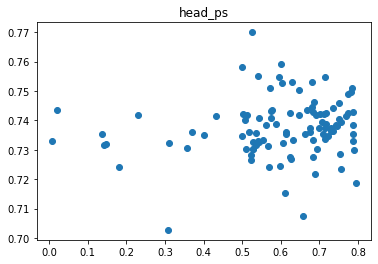

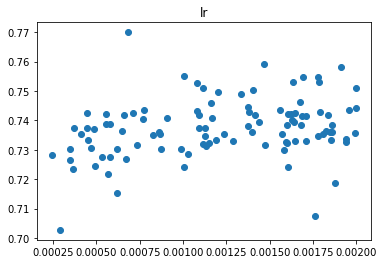

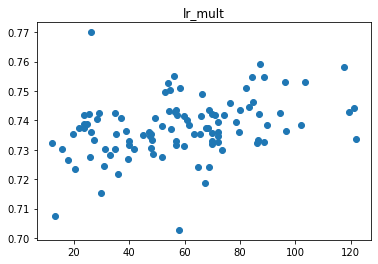

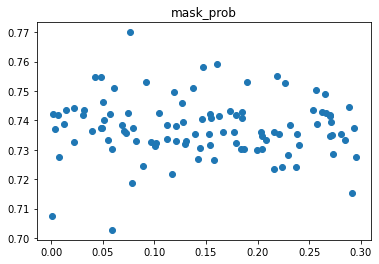

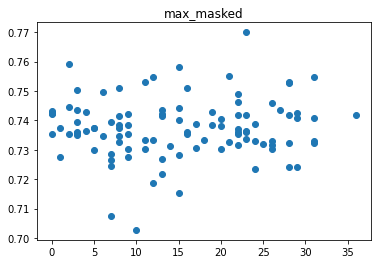

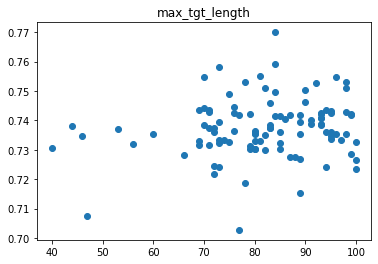

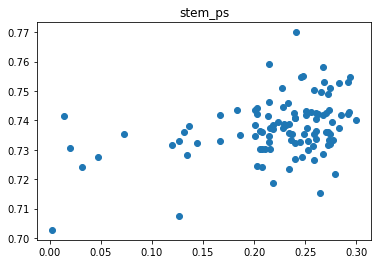

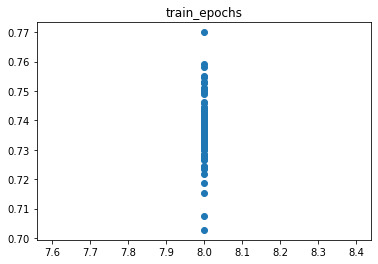

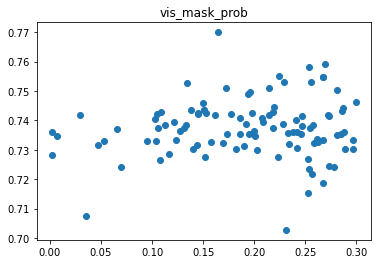

In [18]:
hypers = vars(eval(res.iloc[0].hypers)).keys()
for hyper in hypers:
    plot(hyper, 'roc')

In [19]:
lr_by_mult = [(get_hyper(row, 'lr')/get_hyper(row, 'lr_mult'), row['roc']) for _,row in res.iterrows()]

In [20]:
lr_by_mult=[(x, r) for (x,r) in lr_by_mult if r >.74]

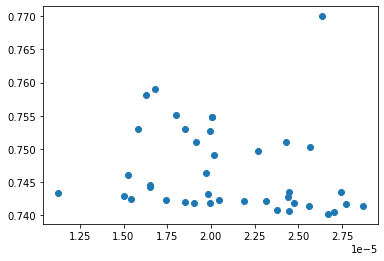

In [21]:
plt.scatter(*zip(*lr_by_mult))

In [12]:
lr_by_mult

[(4.311967448278565e-05, 0.7288386885023257),
 (3.2302944741785443e-05, 0.7401752737945683),
 (0.00016695115859095995, 0.7010329307996725),
 (3.122870725287694e-05, 0.7188093001497711),
 (1.1314052541961288e-05, 0.7324150887875324),
 (2.7403882155514044e-05, 0.7441176137714047),
 (6.965124228113801e-05, 0.7270995318235491),
 (6.30976934645507e-05, 0.7108963258900445),
 (1.2019367708944702e-05, 0.7379362510421736),
 (6.629115159944925e-05, 0.7218066103044091),
 (2.1488578438069038e-05, 0.7188941830679327),
 (0.00010373977395409105, 0.7251679738636064),
 (0.00019519655792899965, 0.7288443473635366),
 (2.0220218049357293e-05, 0.737549562192771),
 (7.106438962494957e-05, 0.7360065793693009),
 (8.86844043650858e-06, 0.7371534419080171),
 (2.330727039146438e-05, 0.7240022484541877),
 (1.126170689206679e-05, 0.7434196875554097),
 (7.367265222018488e-06, 0.7281973508984385),
 (4.97820307053062e-06, 0.7027173851534116),
 (1.8420732421865497e-05, 0.7350483455376107),
 (9.786911332726544e-06, 0.7